Import statements, configurations and read data

In [304]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.mlab as mlab

# adjust configurations of the plots that we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

# read data
df = pd.read_csv('movies.csv')

Inspecting data

In [305]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Data Cleaning

In [307]:
# Inspect: duplicated data
df.duplicated().sum()

0

In [308]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [309]:
# Inspect: missing data
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [310]:
# drop nulls 
df.dropna(inplace=True)

In [311]:
# change data types
df.votes = df.votes.astype('int64')
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')
df.runtime = df.runtime.astype('int64')

Data Exploration

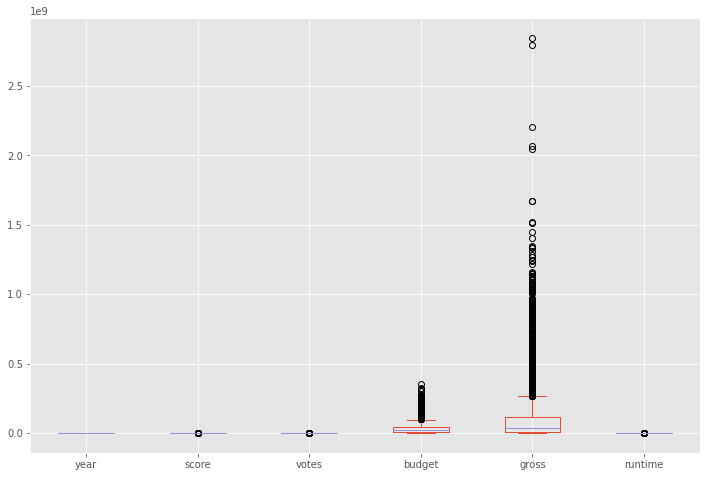

In [312]:
# check for Outliers
df.plot(kind='box');

In [313]:
# order movies by earnings(gross)
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


Check for correlations between different variables

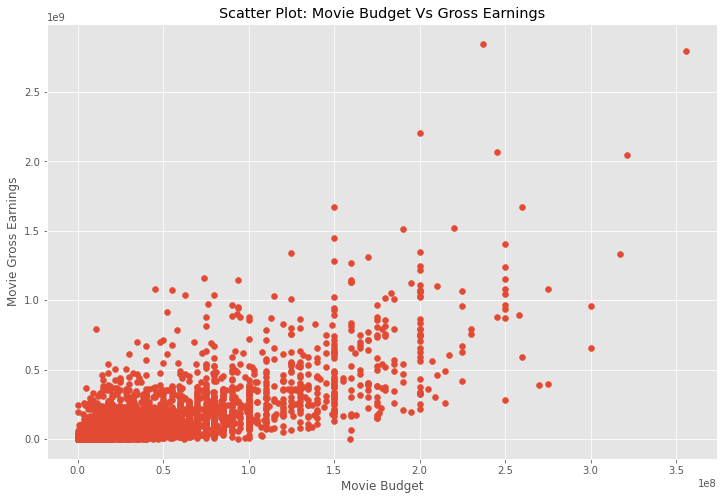

In [314]:
# scatter plot with gross and budget  
plt.scatter(x=df.budget,y=df.gross)
plt.title('scatter plot: movie budget vs gross earnings'.title())
plt.xlabel('movie budget'.title())
plt.ylabel('movie gross earnings'.title())
plt.show()

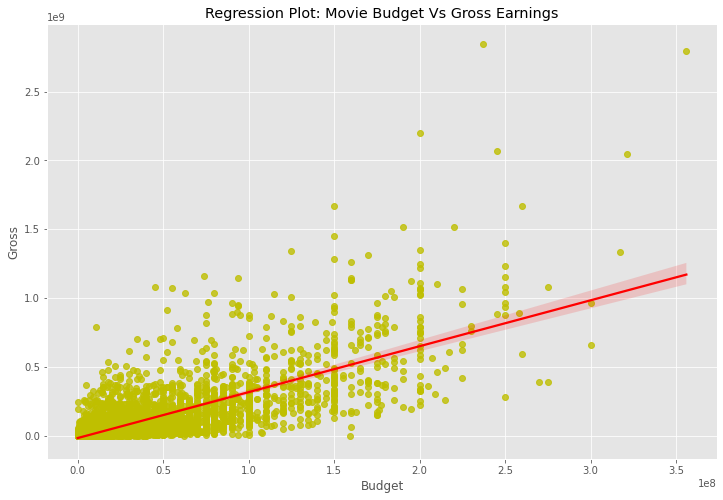

In [315]:
# plot with gross and budget using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"y"}, line_kws={"color":"r"})
plt.title('regression plot: movie budget vs gross earnings'.title())
plt.xlabel('budget'.title())
plt.ylabel('gross'.title())
plt.show()

In [316]:
# look at Correlation Matrix between all numeric columns

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Highest correlation to gross are that of budget and votes.

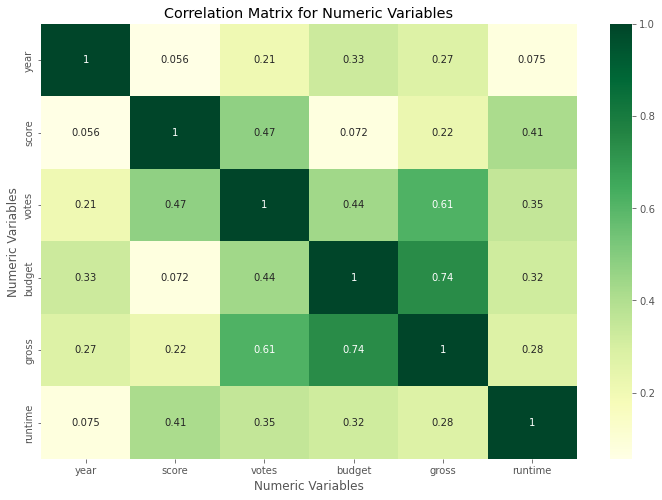

In [317]:
sns.heatmap(df.corr(), annot=True, cmap='YlGn')
plt.title("Correlation Matrix for Numeric Variables")
plt.xlabel("Numeric Variables")
plt.ylabel("Numeric Variables")
plt.show()

Look at correlations after encoding categorical data

In [318]:
# encoding categorical data

df_encoded = df.copy()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = df_encoded[column].astype('category')
        df_encoded[column] = df_encoded[column].cat.codes
        

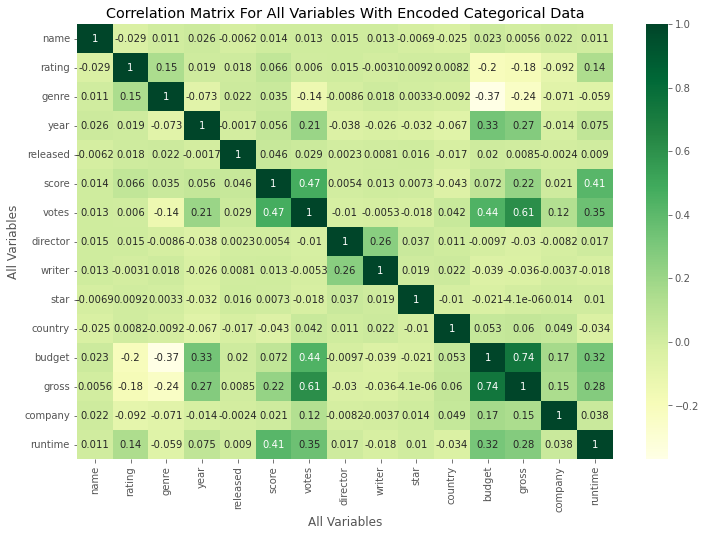

In [319]:
#df_encoded.corr()

sns.heatmap(df_encoded.corr(), annot=True, cmap='YlGn')
plt.title("Correlation Matrix for ALL Variables with encoded categorical data".title())
plt.xlabel("All Variables")
plt.ylabel("All Variables")
plt.show()

In [366]:
# quik look at top 10  movies earnings

df.groupby(['name','company'])[['gross','budget']].sum().sort_values('gross', ascending = False)[:20]

,,gross,budget
name,company,,
Avatar,Twentieth Century Fox,2847246203,237000000
Avengers: Endgame,Marvel Studios,2797501328,356000000
The Lion King,Walt Disney Pictures,2754448457,305000000
Titanic,Twentieth Century Fox,2201647264,200000000
Star Wars: Episode VII - The Force Awakens,Lucasfilm,2069521700,245000000
Avengers: Infinity War,Marvel Studios,2048359754,321000000
Jurassic World,Universal Pictures,1670516444,150000000
Aladdin,Walt Disney Pictures,1554744172,211000000
The Avengers,Marvel Studios,1518815515,220000000


Findings:

Budget and votes have highest correlation to gross.